# Modular pipeline assignment

Author: Kunal PATIL (AIS S20)

Import Neccesary Libraries

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

Import pipeline Module

In [ ]:
from ../recsys/pipeline import *

Trials with Module

In [ ]:
KNN_data = {'k':40, 'min_k':1 ,'sim_options': {'user_based': False, 'name': 'pearson'}}
model, metrics_dict = train_and_evalute_model_pipeline('KNN', model_kwargs=KNN_data, load_from_surprise=False)
model, metrics_dict

Computing the pearson similarity matrix...
Done computing similarity matrix.


(<surprise.prediction_algorithms.knns.KNNBasic at 0x7f147b03d3c8>,
 {'MAE': 0.7522015252807513,
  'RMSE': 0.972090216587812,
  'fit time': 27.99131202697754})

## Model BenchMarking

Here we will perform benchmarking for algorithm KNNBasic:

    User Based Model
        Cosine Similarity
        Pearson Similarity

    Item Based Model
        Cosine Similarity
        Pearson Similarity

    NMF User Based Model

    SVD User Based Model



In [ ]:
model_dict_for_benchmark = {'KNN Cosine Similarity User Based Model': 
                            {'algo': 'KNN', 'model_kwargs': 
                             {'k':40, 'min_k':1 ,'sim_options': 
                              {'user_based': True, 'name': 'cosine'}}, 
                             'from_surprise':False},
                            
                            'KNN Pearson Similarity User Based Model':
                            {'algo': 'KNN', 'model_kwargs':
                             {'k':40, 'min_k':1 ,'sim_options': 
                              {'user_based': True, 'name': 'pearson'}},
                             'from_surprise':False},
                            
                            'KNN Cosine Similarity Item Based Model':
                            {'algo': 'KNN', 'model_kwargs':
                             {'k':40, 'min_k':1 ,'sim_options': 
                              {'user_based': False, 'name': 'cosine'}},
                             'from_surprise':False},
                            
                            'KNN Pearson Similarity Item Based Model':
                            {'algo': 'KNN', 'model_kwargs':
                             {'k':40, 'min_k':1 ,'sim_options': 
                              {'user_based': False, 'name': 'pearson'}},
                             'from_surprise':False},
                            
                            'NMF User Based Model':
                            {'algo': 'NMF', 'model_kwargs':
                             {'n_factors':15, 'n_epochs': 50, 'verbose':False},
                             'from_surprise':False},
                            
                            'SVD User Based Model':
                            {'algo': 'SVD', 'model_kwargs':{}, 
                             'from_surprise':False}
                            }
                            

In [ ]:
df = benchmark(model_dict_for_benchmark)
df

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


,Model Name,RMSE,MAE,Fit Time
0,KNN Cosine Similarity User Based Model,0.980566,0.755153,0.361765
1,KNN Pearson Similarity User Based Model,0.981730,0.756999,0.519544
2,KNN Cosine Similarity Item Based Model,0.979963,0.761495,23.439316
3,KNN Pearson Similarity Item Based Model,0.972090,0.752202,25.075799
4,NMF User Based Model,0.931591,0.710343,6.710555
5,SVD User Based Model,0.881964,0.678153,5.420250


## Comparative Graphs

Graph for RMSE

In [ ]:
import plotly.express as px
fig = px.bar(df, x='Model Name', y='RMSE', range_y=[0.8,1], title="RMSE")
fig.show()

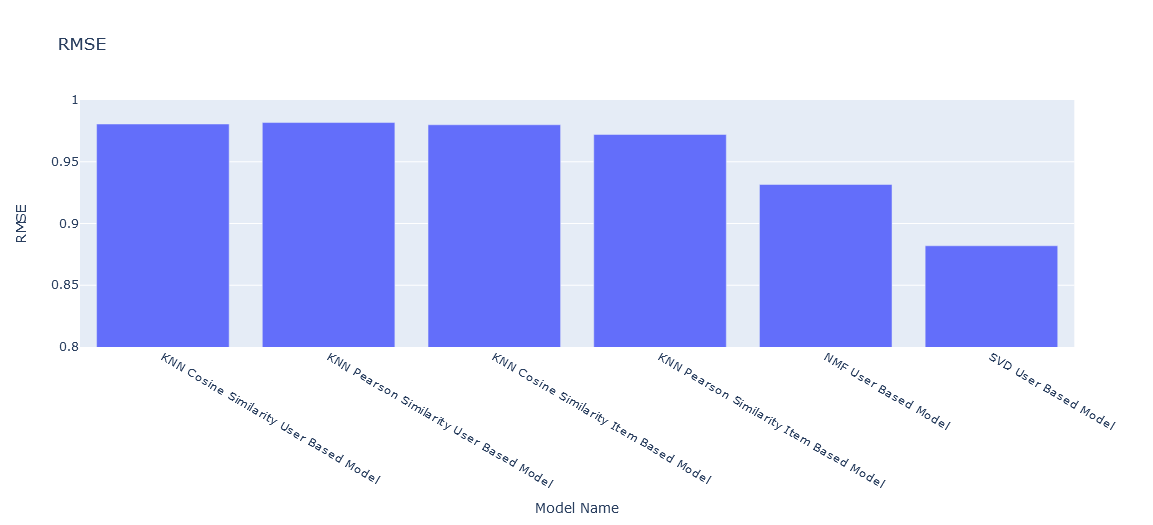

Graph for MAE

In [ ]:
import plotly.express as px
fig = px.bar(df, x='Model Name', y='MAE', range_y=[0.6, 0.8], title="MAE")
fig.show()

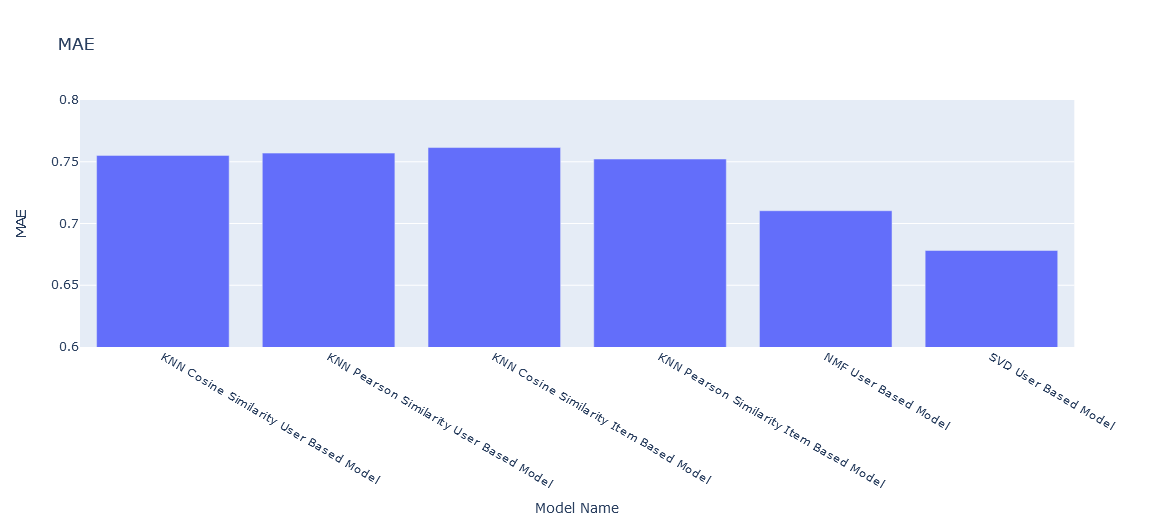

Graph for Fit Time

In [ ]:
import plotly.express as px
fig = px.bar(df, x='Model Name', y='Fit Time', title="Fit Time")
fig.show()

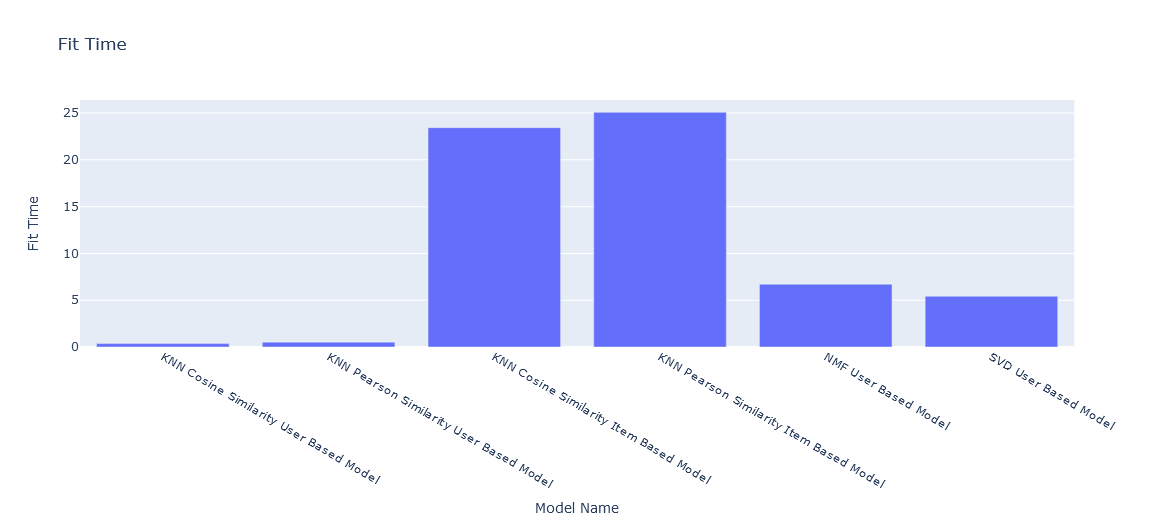